In [486]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [487]:
cars = pd.read_csv('../data/ScrapedData/cars_cleaned.csv')
cars.shape

(5062, 13)

In [488]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5062 entries, 0 to 5061
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_make          5062 non-null   object 
 1   car_model         5050 non-null   object 
 2   model_year        5062 non-null   int64  
 3   km                5062 non-null   int64  
 4   transmission      5062 non-null   object 
 5   fuel              5062 non-null   object 
 6   color             5062 non-null   object 
 7   no_doors          635 non-null    float64
 8   engine_capacity   5062 non-null   float64
 9   drive_type        5062 non-null   object 
 10  no_cylinders      3174 non-null   float64
 11  Accident_history  5062 non-null   object 
 12  price             5062 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 514.2+ KB


In [489]:
cars.dropna(subset = ['car_model'], inplace=True)

In [490]:
cars.describe()

,model_year,km,no_doors,engine_capacity,no_cylinders,price
count,5050.000000,5.050000e+03,635.000000,5050.000000,3173.000000,5.050000e+03
mean,2014.514455,1.756333e+05,4.176378,2729.270491,5.458241,6.289525e+04
std,3.995825,1.370052e+05,0.589399,1218.058491,1.562054,7.207942e+04
min,1976.000000,0.000000e+00,2.000000,1.000000,3.000000,5.300000e+01
25%,2013.000000,9.200000e+04,4.000000,1800.000000,4.000000,2.400000e+04
50%,2015.000000,1.610000e+05,4.000000,2500.000000,6.000000,4.100000e+04
75%,2017.000000,2.420000e+05,4.000000,3000.000000,6.000000,7.200000e+04
max,2023.000000,4.300000e+06,5.000000,6400.000000,12.000000,1.111000e+06


# EDA 

#### 1- Distribution of data (Numerical Data)

/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

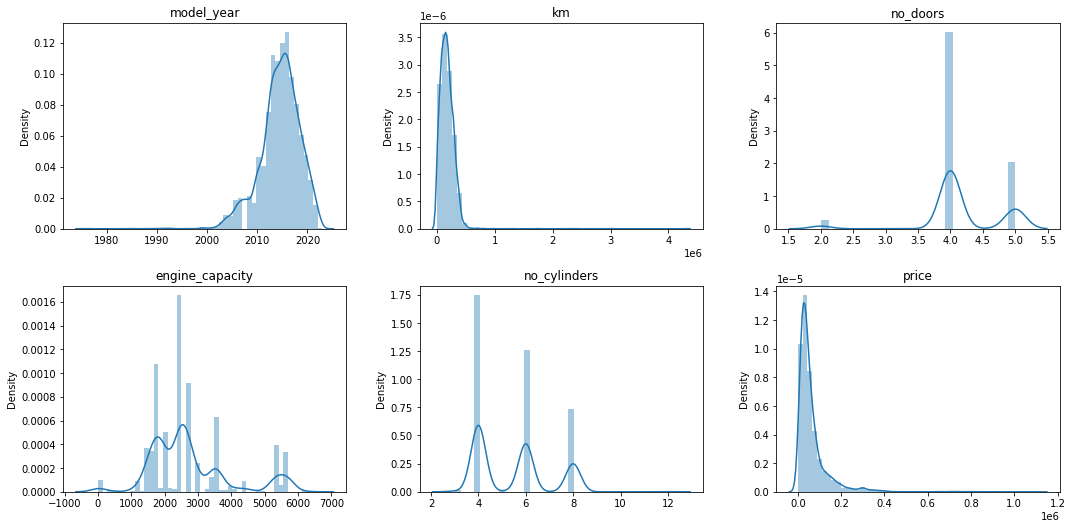

In [491]:
df_dist = cars.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.distplot(x=df_dist[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

### Removing outliers 

- engine_capacity

In [492]:
cars = cars[~(cars['engine_capacity'] <= 1000)]  
cars = cars[~(cars['engine_capacity'] >= 6000)]  

- no_cylinders

In [493]:
cars = cars[~(cars['no_cylinders'] >= 12)] 

- model_year

In [494]:
cars = cars[~(cars['model_year'] <= 2006)] 
cars = cars[~(cars['model_year'] >= 2023)] 

- price

In [495]:
cars[(cars['price'] >= 500000)].count()

car_make            15
car_model           15
model_year          15
km                  15
transmission        15
fuel                15
color               15
no_doors             2
engine_capacity     15
drive_type          15
no_cylinders        13
Accident_history    15
price               15
dtype: int64

In [496]:
cars = cars[~(cars['price'] >= 500000)] 

### Transforming km and engine_capacity

In [497]:
#cars['price'] = np.sqrt(cars['price'])
cars['km'] = np.sqrt(cars['km'])
cars['engine_capacity'] = np.sqrt(cars['engine_capacity'])

/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

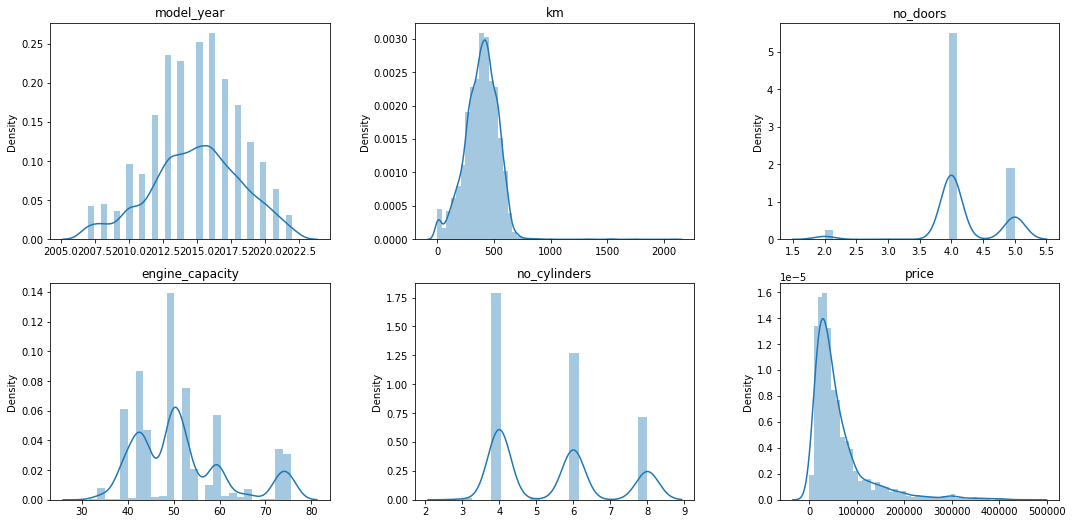

In [498]:
df_dist = cars.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.distplot(x=df_dist[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

### Removing outliers again after Transformation

In [499]:
# how many values greater than 1000 we have in km feature 

cars[(cars['km'] >= 1000)].count()

car_make            5
car_model           5
model_year          5
km                  5
transmission        5
fuel                5
color               5
no_doors            1
engine_capacity     5
drive_type          5
no_cylinders        1
Accident_history    5
price               5
dtype: int64

In [500]:
# Let's remove them 

cars = cars[~(cars['km'] >= 1000)]  

/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

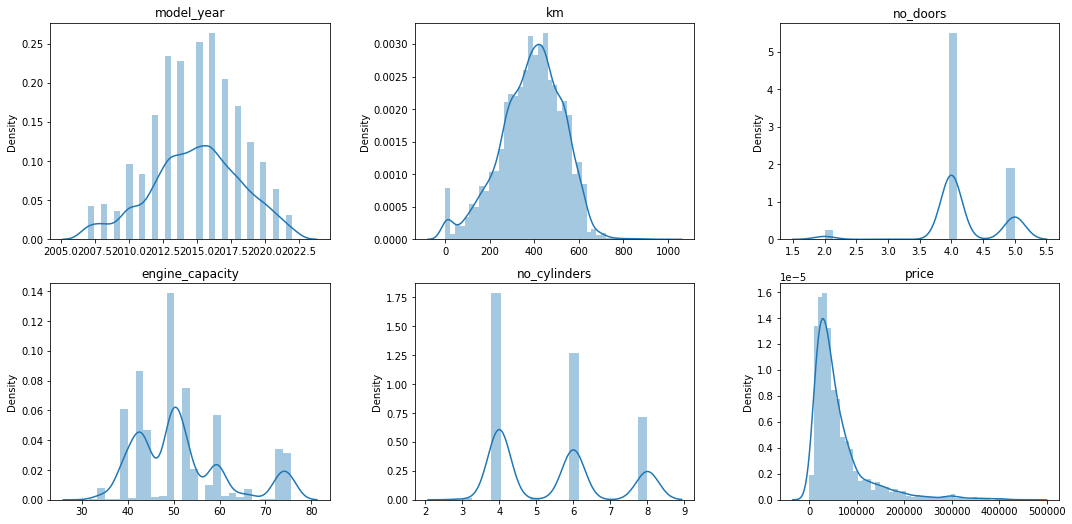

In [501]:
df_dist = cars.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.distplot(x=df_dist[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

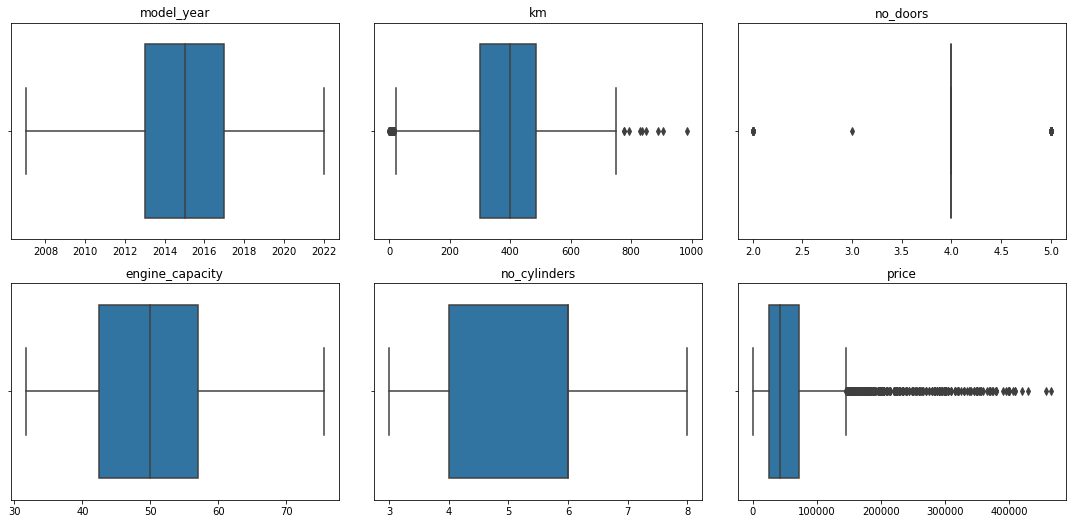

In [502]:
df_box = cars.select_dtypes([int,float]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_box.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.boxplot(x=df_box[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

## Let's check for price outlires in each car_make

<AxesSubplot:xlabel='price', ylabel='car_make'>

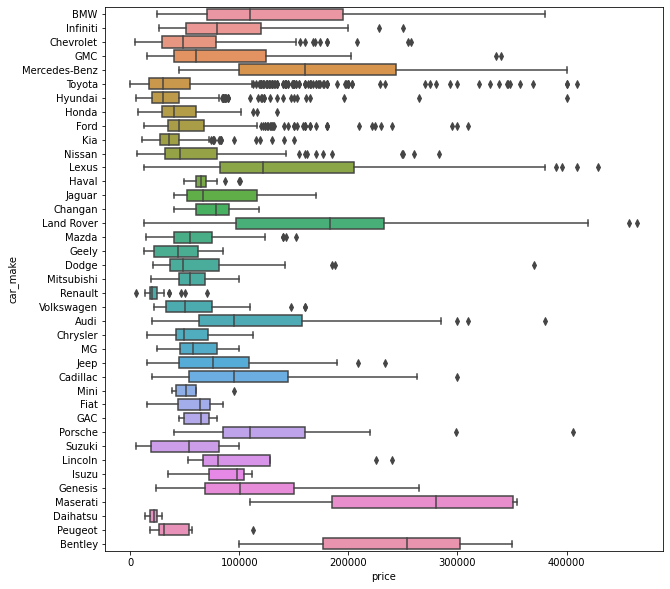

In [503]:
fig = plt.figure(figsize=(10, 10)) 
sns.boxplot(data=cars, y = 'car_make', x = 'price')
#plt.xticks(rotation=90)

<h1 style = 'color:red' >solved</h1>

#### After taking a quick glimpse at the excel sheet, I found that there's mistyped observations for the price feature, an example is Toyota (Yaris) with a price of 125k which is wrong. 


In [504]:
qs = cars.groupby("car_model")["price"].quantile([0,0.99])
qs = qs.unstack().reset_index()
qs.columns = ["car_model", "q1", "q3"]

cars = pd.merge(cars, qs, on="car_model", how="left")
cars

# Source code :
# https://stackoverflow.com/questions/48994157/get-the-number-of-outliers-by-group-in-pandas

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price,q1,q3
0,BMW,7,2018,186.467155,Automatic,Petrol,Silver,4.0,54.772256,Rear Wheel Drive,4.0,Perfect inside out,190000,29000.0,337740.0
1,Infiniti,QX80,2020,197.301799,Automatic,Petrol,White,5.0,74.511744,All Wheel Drive,8.0,Perfect inside out,228350,80000.0,249134.0
2,Chevrolet,Suburban,2018,191.903622,Automatic,Petrol,Black,5.0,72.801099,Rear Wheel Drive,8.0,Perfect inside out,135575,27000.0,173250.0
3,Chevrolet,Silverado,2016,377.797565,Automatic,Petrol,White,2.0,72.801099,All Wheel Drive,8.0,Perfect inside out,64450,26000.0,99120.0
4,GMC,Yukon,2018,281.964537,Automatic,Petrol,Gray,5.0,72.993150,Rear Wheel Drive,8.0,Perfect inside out,145350,20000.0,336550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4712,Volkswagen,CC,2014,383.405790,Automatic,Petrol,Black,NaN,52.242420,Drive,4.0,Perfect inside out,40000,22000.0,88040.0
4713,Fiat,500,2012,357.770876,Automatic,Petrol,White,NaN,52.242420,Drive,4.0,Perfect inside out,28500,28500.0,84825.0
4714,Land Rover,Rover,2019,234.520788,Automatic,Petrol,Blue,NaN,66.294796,Drive,8.0,Perfect inside out,457500,13000.0,461700.0
4715,Toyota,Land,2015,379.473319,Automatic,Petrol,White,NaN,75.498344,Drive,4.0,Perfect inside out,90000,12000.0,363020.0


In [505]:
cars["Outlier"] = ~cars["price"].between(cars["q1"], cars["q3"])
cars

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price,q1,q3,Outlier
0,BMW,7,2018,186.467155,Automatic,Petrol,Silver,4.0,54.772256,Rear Wheel Drive,4.0,Perfect inside out,190000,29000.0,337740.0,False
1,Infiniti,QX80,2020,197.301799,Automatic,Petrol,White,5.0,74.511744,All Wheel Drive,8.0,Perfect inside out,228350,80000.0,249134.0,False
2,Chevrolet,Suburban,2018,191.903622,Automatic,Petrol,Black,5.0,72.801099,Rear Wheel Drive,8.0,Perfect inside out,135575,27000.0,173250.0,False
3,Chevrolet,Silverado,2016,377.797565,Automatic,Petrol,White,2.0,72.801099,All Wheel Drive,8.0,Perfect inside out,64450,26000.0,99120.0,False
4,GMC,Yukon,2018,281.964537,Automatic,Petrol,Gray,5.0,72.993150,Rear Wheel Drive,8.0,Perfect inside out,145350,20000.0,336550.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4712,Volkswagen,CC,2014,383.405790,Automatic,Petrol,Black,NaN,52.242420,Drive,4.0,Perfect inside out,40000,22000.0,88040.0,False
4713,Fiat,500,2012,357.770876,Automatic,Petrol,White,NaN,52.242420,Drive,4.0,Perfect inside out,28500,28500.0,84825.0,False
4714,Land Rover,Rover,2019,234.520788,Automatic,Petrol,Blue,NaN,66.294796,Drive,8.0,Perfect inside out,457500,13000.0,461700.0,False
4715,Toyota,Land,2015,379.473319,Automatic,Petrol,White,NaN,75.498344,Drive,4.0,Perfect inside out,90000,12000.0,363020.0,False


In [506]:
cars[(cars['Outlier'] == True)].count()

car_make            231
car_model           231
model_year          231
km                  231
transmission        231
fuel                231
color               231
no_doors             30
engine_capacity     231
drive_type          231
no_cylinders        196
Accident_history    231
price               231
q1                  231
q3                  231
Outlier             231
dtype: int64

# Examples of outlires that fall in the 0.999 range of quartile

In [507]:
cars[(cars['car_model'] == 'Yaris') & (cars['Outlier'] == True)]

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price,q1,q3,Outlier
3697,Toyota,Yaris,2013,509.901951,Automatic,Petrol,White,NaN,38.678159,Drive,NaN,Perfect inside out,200000,7000.0,118040.0,True
4487,Toyota,Yaris,2012,469.041576,Automatic,Petrol,White,NaN,38.678159,Drive,NaN,Perfect inside out,125000,7000.0,118040.0,True


In [508]:
cars[(cars['car_model'] == 'Elantra') & (cars['Outlier'] == True)]

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price,q1,q3,Outlier
2286,Hyundai,Elantra,2012,118.321596,Automatic,Petrol,Silver,NaN,42.426407,Drive,NaN,Perfect inside out,196000,9000.0,108240.0,True
3694,Hyundai,Elantra,2012,538.516481,Automatic,Petrol,Bronze,NaN,42.426407,Drive,NaN,Perfect inside out,265000,9000.0,108240.0,True
4370,Hyundai,Elantra,2015,428.952212,Automatic,Petrol,Silver,NaN,42.426407,Drive,NaN,Perfect inside out,150000,9000.0,108240.0,True


In [509]:
# Droping rows that have Outlier as True 
cars.drop(cars[cars['Outlier'] == True].index, inplace=True)

In [510]:
cars[(cars['Outlier'] == True)].count()

car_make            0
car_model           0
model_year          0
km                  0
transmission        0
fuel                0
color               0
no_doors            0
engine_capacity     0
drive_type          0
no_cylinders        0
Accident_history    0
price               0
q1                  0
q3                  0
Outlier             0
dtype: int64

In [511]:
cars.drop(columns=['q1','q3','Outlier'], inplace=True, axis=1)

In [512]:
cars.shape

(4486, 13)

## price with model_year

<AxesSubplot:xlabel='model_year', ylabel='price'>

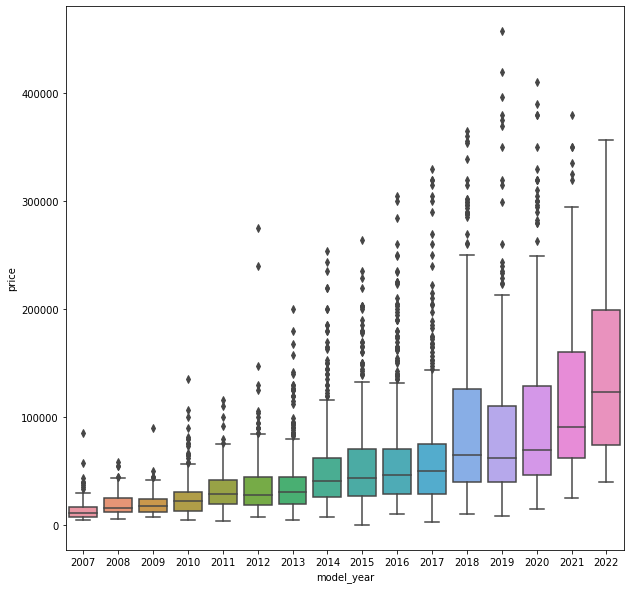

In [513]:
fig = plt.figure(figsize=(10, 10)) 
sns.boxplot(data=cars, x = 'model_year', y = 'price')

## price with no_cylinders

<AxesSubplot:xlabel='no_cylinders', ylabel='price'>

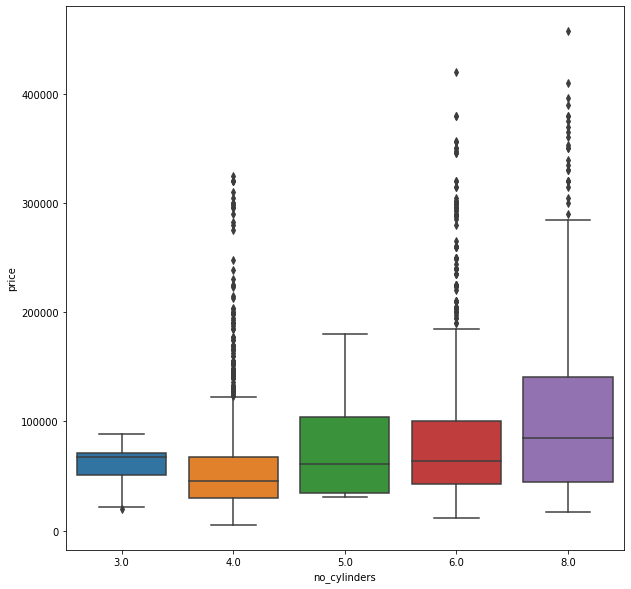

In [514]:
fig = plt.figure(figsize=(10, 10)) 
sns.boxplot(data=cars, x = 'no_cylinders', y = 'price')

### an explanation behind price outliers in V4 and V6 cars is that most of German cars (BMW, Audi, etc..) come in V4 and V6 engines and they are expensive in price. 

<AxesSubplot:xlabel='no_cylinders', ylabel='engine_capacity'>

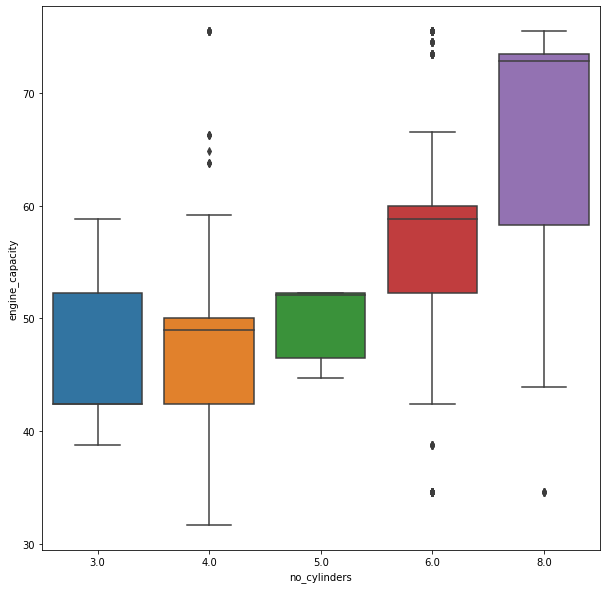

In [515]:
fig = plt.figure(figsize=(10, 10)) 
sns.boxplot(data=cars, x = 'no_cylinders', y = 'engine_capacity')

### It's known that engine capacity increases with more number of cylinders, engine size refers to the total volume of the cylinders in the engine.
- later on we will use KNN Imputer for no_cylinders and no_doors.

## Linearity of independent features and the dependent target

<AxesSubplot:title={'center':'Price and engine_capacity'}, xlabel='engine_capacity', ylabel='price'>

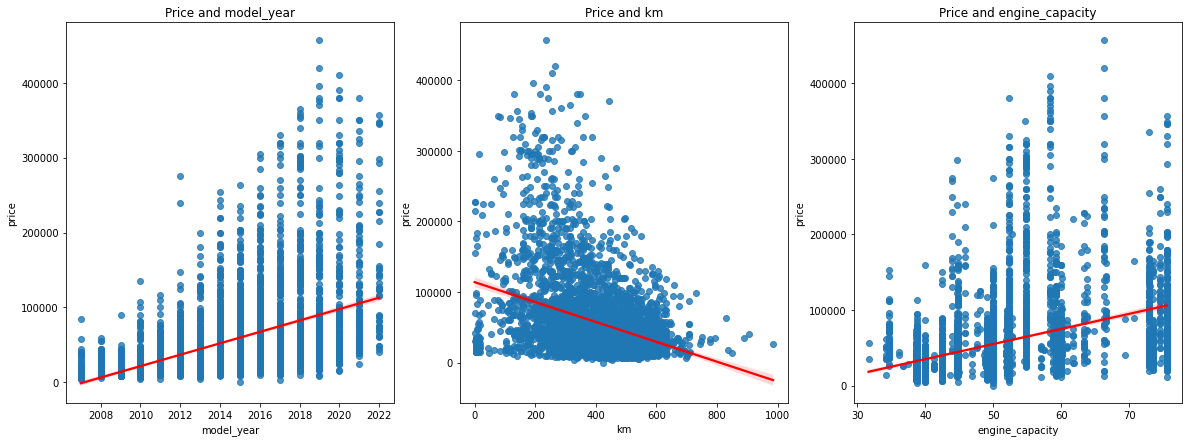

In [516]:
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and model_year")
sns.regplot(x='model_year',y='price',data=cars, line_kws={"color": "red"})

plt.subplot(1,3,2)
plt.title("Price and km")
sns.regplot(x='km',y='price',data=cars, line_kws={"color": "red"})

plt.subplot(1,3,3)
plt.title("Price and engine_capacity")
sns.regplot(y='price',x='engine_capacity',data=cars, line_kws={"color": "red"})



# Correlation 

<AxesSubplot:>

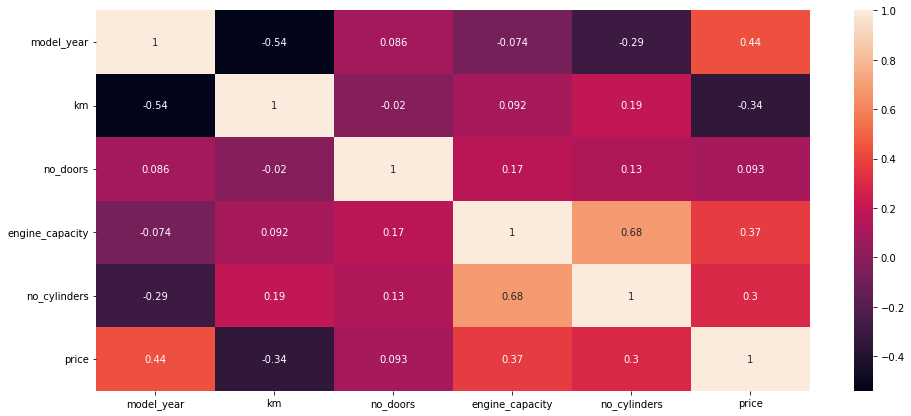

In [517]:
plt.figure(figsize=(16, 7))
sns.heatmap(cars.corr(), annot = True)

<h>Independent variables:</h>
- engine_capacity and no_cylinders have a moderate positive correlation 
- model_year and and km have a moderate negative correlation 

<h>Target variable with Independent variables:</h>

- price and model_year have a low positive correlation 
- price and engine_capacity have a low positive correlation

# Categorical Data

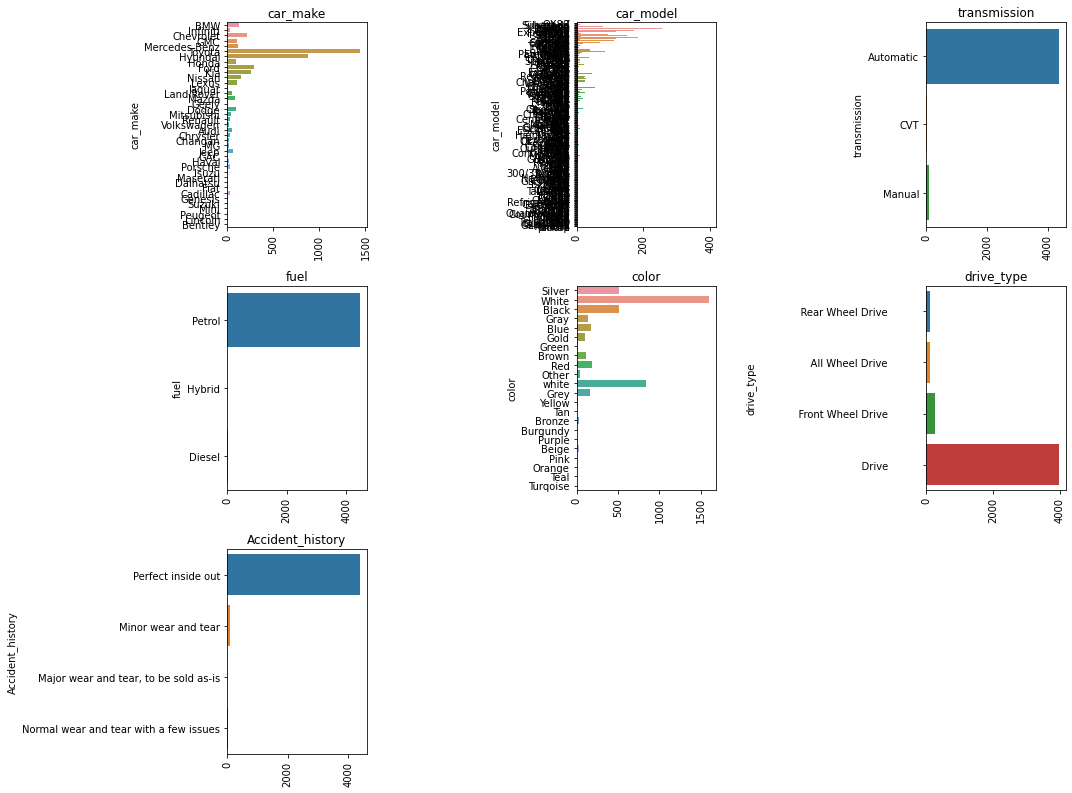

In [518]:
df_dist = cars.select_dtypes([object]) 
fig = plt.figure(figsize=(15, 18)) 
try:
    for i,columns in enumerate(df_dist.columns, 1): 
        ax = plt.subplot(5,3,i) 
        sns.countplot(y=df_dist[columns])
        ax.set_xlabel(None) 
        ax.set_title(f'{columns}')
        plt.xticks(rotation=90)
        plt.tight_layout(w_pad=3) 
except ValueError as ve:
    exit;      
plt.show()

#### drive_type feature has a mistyped observation 'drive' with a count more than 4000, It doesn't tell us anything about the drive type, so we might have to drop the entire column as it wouldn't help us much unless we knew the true value of the observation.

In [519]:
cars.drop(['drive_type'], axis = 1, inplace = True)

#### there's two feature values for color white on with upper case and one with lower, let's resolve it

In [520]:
cars['color'] = cars['color'].replace(['white'],['White'])

## Price and color 

<AxesSubplot:xlabel='price', ylabel='color'>

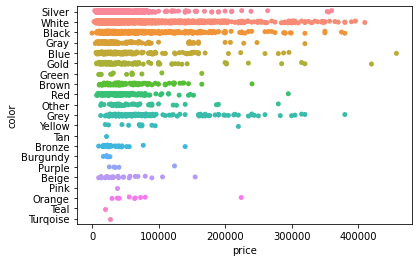

In [521]:
sns.stripplot(data = cars , x = 'price', y = 'color')

### Due to the dusty weather in KSA light colors are the most desirable espacially 'white', and that can result in an increased price for light color cars 

In [560]:
#cars.to_csv(r'cars_train_test.csv', index = False, header=True)

In [523]:
cars.head()

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,no_cylinders,Accident_history,price
0,BMW,7,2018,186.467155,Automatic,Petrol,Silver,4.0,54.772256,4.0,Perfect inside out,190000
1,Infiniti,QX80,2020,197.301799,Automatic,Petrol,White,5.0,74.511744,8.0,Perfect inside out,228350
2,Chevrolet,Suburban,2018,191.903622,Automatic,Petrol,Black,5.0,72.801099,8.0,Perfect inside out,135575
3,Chevrolet,Silverado,2016,377.797565,Automatic,Petrol,White,2.0,72.801099,8.0,Perfect inside out,64450
4,GMC,Yukon,2018,281.964537,Automatic,Petrol,Gray,5.0,72.993150,8.0,Perfect inside out,145350


# KNN Imputer
- no_cylinders
- no_doors

In [524]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# First let's Encode categorical data 

In [525]:
label_encoder = preprocessing.LabelEncoder()

### Hear I made a dataset as refrence for the categorical variables, in model deployment when taking input from the user I'll use this data set to search for the input cross bonding to it's value. For example car_make BMW cross bonds to 1 as label encode variable.

In [526]:
cars_no = cars.copy()

In [527]:
cars_no['car_make_no']= label_encoder.fit_transform(cars_no['car_make'])
cars_no['car_model_no']= label_encoder.fit_transform(cars_no['car_model'])
cars_no['transmission_no']= label_encoder.fit_transform(cars_no['transmission'])
cars_no['fuel_no']= label_encoder.fit_transform(cars_no['fuel'])
cars_no['color_no']= label_encoder.fit_transform(cars_no['color'])
cars_no['Accident_history_no']= label_encoder.fit_transform(cars_no['Accident_history'])

In [528]:
cars_no.drop(columns=['model_year','km','no_doors','engine_capacity','no_cylinders','price'], inplace=True)

In [529]:
cars_no.drop_duplicates(inplace=True)

In [530]:
cars_no.head()

,car_make,car_model,transmission,fuel,color,Accident_history,car_make_no,car_model_no,transmission_no,fuel_no,color_no,Accident_history_no
0,BMW,7,Automatic,Petrol,Silver,Perfect inside out,1,16,0,2,15,3
1,Infiniti,QX80,Automatic,Petrol,White,Perfect inside out,18,226,0,2,19,3
2,Chevrolet,Suburban,Automatic,Petrol,Black,Perfect inside out,5,265,0,2,1,3
3,Chevrolet,Silverado,Automatic,Petrol,White,Perfect inside out,5,258,0,2,19,3
4,GMC,Yukon,Automatic,Petrol,Gray,Perfect inside out,12,305,0,2,7,3


In [531]:
#cars_no.to_csv(r'cars_no_test.csv', index = False, header=True)

In [532]:
x = 'Manual'

In [533]:
transmission_no = cars_no['transmission_no'].where(cars_no['transmission'] == x).dropna().drop_duplicates().values[0]
transmission_no

2.0

 ### Encoding variables in the main dataset for model building

In [534]:
cars['car_make']= label_encoder.fit_transform(cars['car_make'])
cars['car_model']= label_encoder.fit_transform(cars['car_model'])
cars['transmission']= label_encoder.fit_transform(cars['transmission'])
cars['fuel']= label_encoder.fit_transform(cars['fuel'])
cars['color']= label_encoder.fit_transform(cars['color'])
cars['Accident_history']= label_encoder.fit_transform(cars['Accident_history'])

In [535]:
cars

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,no_cylinders,Accident_history,price
0,1,16,2018,186.467155,0,2,15,4.0,54.772256,4.0,3,190000
1,18,226,2020,197.301799,0,2,19,5.0,74.511744,8.0,3,228350
2,5,265,2018,191.903622,0,2,1,5.0,72.801099,8.0,3,135575
3,5,258,2016,377.797565,0,2,19,2.0,72.801099,8.0,3,64450
4,12,305,2018,281.964537,0,2,7,5.0,72.993150,8.0,3,145350
...,...,...,...,...,...,...,...,...,...,...,...,...
4712,38,50,2014,383.405790,0,2,1,NaN,52.242420,4.0,3,40000
4713,9,12,2012,357.770876,0,2,19,NaN,52.242420,4.0,3,28500
4714,23,241,2019,234.520788,0,2,2,NaN,66.294796,8.0,3,457500
4715,37,176,2015,379.473319,0,2,19,NaN,75.498344,4.0,3,90000


In [536]:
imputer = KNNImputer(n_neighbors=3)
cars = pd.DataFrame(imputer.fit_transform(cars),columns = cars.columns)

In [537]:
cars

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,no_cylinders,Accident_history,price
0,1.0,16.0,2018.0,186.467155,0.0,2.0,15.0,4.000000,54.772256,4.0,3.0,190000.0
1,18.0,226.0,2020.0,197.301799,0.0,2.0,19.0,5.000000,74.511744,8.0,3.0,228350.0
2,5.0,265.0,2018.0,191.903622,0.0,2.0,1.0,5.000000,72.801099,8.0,3.0,135575.0
3,5.0,258.0,2016.0,377.797565,0.0,2.0,19.0,2.000000,72.801099,8.0,3.0,64450.0
4,12.0,305.0,2018.0,281.964537,0.0,2.0,7.0,5.000000,72.993150,8.0,3.0,145350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4481,38.0,50.0,2014.0,383.405790,0.0,2.0,1.0,4.000000,52.242420,4.0,3.0,40000.0
4482,9.0,12.0,2012.0,357.770876,0.0,2.0,19.0,4.000000,52.242420,4.0,3.0,28500.0
4483,23.0,241.0,2019.0,234.520788,0.0,2.0,2.0,4.000000,66.294796,8.0,3.0,457500.0
4484,37.0,176.0,2015.0,379.473319,0.0,2.0,19.0,4.000000,75.498344,4.0,3.0,90000.0


In [538]:
for i in cars.columns[:11]:
        try:
            cars[[i]] = cars[[i]].astype(int)
        except:
            pass

In [539]:
cars.isna().sum().sum()

0

In [571]:
#cars.to_csv(r'cars_train_test.csv', index = False, header=True)

# Model Building

In [540]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn import metrics

In [541]:
carslrm = cars

In [542]:
carslrm

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,no_cylinders,Accident_history,price
0,1,16,2018,186,0,2,15,4,54,4,3,190000.0
1,18,226,2020,197,0,2,19,5,74,8,3,228350.0
2,5,265,2018,191,0,2,1,5,72,8,3,135575.0
3,5,258,2016,377,0,2,19,2,72,8,3,64450.0
4,12,305,2018,281,0,2,7,5,72,8,3,145350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4481,38,50,2014,383,0,2,1,4,52,4,3,40000.0
4482,9,12,2012,357,0,2,19,4,52,4,3,28500.0
4483,23,241,2019,234,0,2,2,4,66,8,3,457500.0
4484,37,176,2015,379,0,2,19,4,75,4,3,90000.0


In [543]:
X = carslrm.drop(['price'], axis=1)
Y = carslrm['price']

In [544]:
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state=123)

In [545]:
X_test

array([[  37,   84, 2014, ...,   42,    4,    3],
       [  22,  239, 2015, ...,   40,    4,    3],
       [  37,  161, 2010, ...,   44,    4,    3],
       ...,
       [  12,   29, 2015, ...,   60,    6,    3],
       [  10,  122, 2012, ...,   50,    4,    3],
       [  37,  304, 2008, ...,   38,    5,    3]])

## Linear Regression

In [546]:
lrm = LinearRegression()

# Training the model
lrm.fit(X_train, Y_train)

# Prediction "testing"
y_pred_lrm = lrm.predict(X_test)

# Model Aucraccy using R2
error_score = metrics.r2_score(Y_test, y_pred_lrm)
print("R2 Score: " ,error_score)

R2 Score:  0.43072384398061403


## Random Forest Regressor

In [547]:
rf = RandomForestRegressor()

# Training the model
rf.fit(X_train,Y_train)

# Prediction "testing"
y_pred_rf = rf.predict(X_test)

error_score = metrics.r2_score(Y_test,y_pred_rf)
print("R2 Score: " ,error_score)


R2 Score:  0.8712589398039956


## Gradient Boosting Regressor 
- Tried hyperparameter tuning for better result, but the XGBRegressor outpreformed it

In [548]:
gbt = GradientBoostingRegressor()

# Training the model
gbt.fit(X_train,Y_train)

# Prediction "testing"
y_pred_gbt = gbt.predict(X_test)

# Model Aucraccy using R2
r_squared = metrics.r2_score(Y_test,y_pred_gbt)
print("R_squared :",r_squared)


R_squared : 0.8410703086363923


## XGBRegressor

In [549]:
from sklearn.metrics import mean_squared_error #RMSE for evaluation
from sklearn.model_selection import GridSearchCV #for exhaustive grid search(hyperparameter tuning)

In [550]:
xgb = XGBRegressor()
from sklearn.metrics import mean_absolute_error
# Training the model
xgb_model = xgb.fit(X_train,Y_train)
y_pred_gbt_train = xgb_model.predict(X_train)
# Prediction "testing"
y_pred_xgb = xgb_model.predict(X_test)

# Model Aucraccy using R2
r_squared = metrics.r2_score(Y_test,y_pred_xgb)
r_squared2 = metrics.r2_score(Y_train,y_pred_gbt_train)
print("R_squared test :",r_squared)
print("R_squared train :",r_squared2)

R_squared test : 0.8331031363739088
R_squared train : 0.851617305402047


# Hyperparameter Tuning

In [551]:
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth': [2, 3, 5, 6],
              'learning_rate': [0.01, 0.2, 0.4, 0.6, 0.8],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750, 1000]
              }

rs_model=RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [552]:
rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END learning_rate=0.6, max_depth=3, n_estimators=100, subsample=0.5;, score=0.752 total time=   0.2s
[CV 3/5] END learning_rate=0.4, max_depth=2, n_estimators=250, subsample=0.8999999999999999;, score=0.842 total time=   0.3s
[CV 2/5] END learning_rate=0.4, max_depth=2, n_estimators=250, subsample=0.8999999999999999;, score=0.857 total time=   0.3s
[CV 1/5] END learning_rate=0.4, max_depth=2, n_estimators=250, subsample=0.8999999999999999;, score=0.773 total time=   0.3s
[CV 4/5] END learning_rate=0.4, max_depth=2, n_estimators=250, subsample=0.8999999999999999;, score=0.831 total time=   0.3s
[CV 2/5] END learning_rate=0.6, max_depth=3, n_estimators=100, subsample=0.5;, score=0.815 total time=   0.2s
[CV 3/5] END learning_rate=0.6, max_depth=3, n_estimators=100, subsample=0.5;, score=0.771 total time=   0.2s
[CV 5/5] END learning_rate=0.6, max_depth=3, n_estimators=100, subsample=0.5;, score=0.841 total time=   0.2s


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.2, 0.4, 0.6,
                                                          0.8],
                                        'max_depth': [2, 3, 5, 6],
                                        'n_estimators': [100, 250, 500, 750,
                                                         1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   verbose=3)

In [553]:
rs_model.best_estimator_

XGBRegressor(learning_rate=0.4, max_depth=2, n_estimators=250,
             subsample=0.8999999999999999)

## Model after Hyperparameter Tuning

In [568]:
xgb = XGBRegressor(learning_rate=0.01, max_depth=6, n_estimators=1000,
             subsample=0.6)
from sklearn.metrics import mean_absolute_error
# Training the model
xgb_model = xgb.fit(X_train,Y_train)
y_pred_gbt_train = xgb_model.predict(X_train)
# Prediction "testing"
y_pred_xgb = xgb_model.predict(X_test)

# Model Aucraccy using R2
r_squared = metrics.r2_score(Y_test,y_pred_xgb)
r_squared2 = metrics.r2_score(Y_train,y_pred_gbt_train)
print("R_squared test :",r_squared)
print("R_squared train :",r_squared2)

R_squared test : 0.8913874292025284
R_squared train : 0.9515316912924333


# Cross validation

In [555]:
from sklearn.model_selection import KFold
kfold_validation=KFold(5)
import numpy as np
from sklearn.model_selection import cross_val_score
mod_score3=cross_val_score(rf,X,Y,cv=kfold_validation)
print(mod_score3)
#Overall accuracy of the model will be average of all values.
print(np.mean(mod_score3))

[0.83462654 0.77315877 0.86479022 0.83900868 0.83084581]
0.8284860052181763


In [556]:
Result=pd.DataFrame({"Actual":Y_test,"Predicted":y_pred_xgb})
Result.head(10)

,Actual,Predicted
0,11000.0,18188.701172
1,24000.0,27387.728516
2,23000.0,25611.593750
3,28000.0,15199.059570
4,142000.0,101737.445312
5,36000.0,26726.265625
6,40000.0,45700.429688
7,13000.0,13257.287109
8,29000.0,25825.142578
9,75000.0,60955.042969


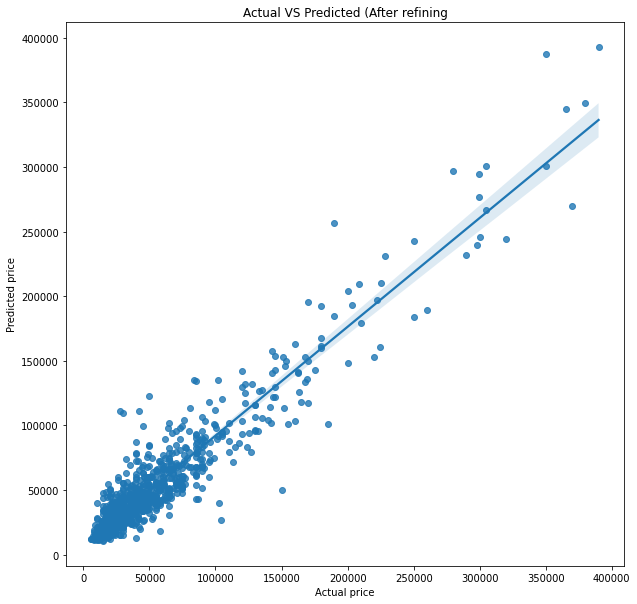

In [557]:
fig, ax = plt.subplots(figsize=(10, 10))



sns.regplot(x=Y_test, y = y_pred_xgb)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual VS Predicted (After refining")
plt.show()

In [569]:
import numpy as np
arr = np.array([[1,18,2018,186,0,2,15,2,54,4,3]])
pred = xgb.predict(arr)

In [570]:
pred

array([200298.48], dtype=float32)